# Home Credit Default Risk

#### nickname: veklenko_v

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = 200
plt.style.use('ggplot')

In [151]:
#загружаем тренировочную, тестовую выборки, а также пример предсказаний
train = pd.read_csv('application_train.csv')
test = pd.read_csv('application_test.csv')
sample_submission = pd.read_csv("sample_submission.csv")

In [152]:
train.shape

(307511, 122)

In [153]:
#посмотрим на данные
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

# Data Cleaning and Preparation

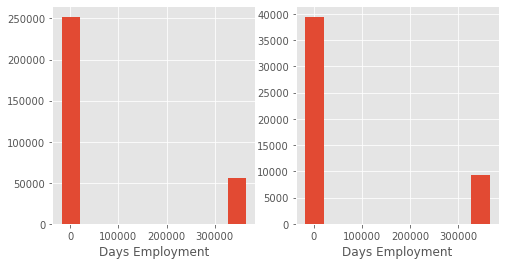

In [154]:
#заметим выбросы:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(8, 4)
)

ax1.hist(train['DAYS_EMPLOYED']);
ax1.set_xlabel('Days Employment');

ax2.hist(test['DAYS_EMPLOYED']);
ax2.set_xlabel('Days Employment');

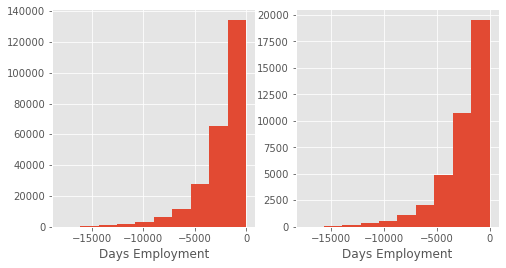

In [156]:
# заменим их на пропуски
train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(8, 4)
)

ax1.hist(train['DAYS_EMPLOYED']);
ax1.set_xlabel('Days Employment');

ax2.hist(test['DAYS_EMPLOYED']);
ax2.set_xlabel('Days Employment');

In [76]:
#напишем функцию для проверки пропущенных значений
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [77]:
missing_values = missing_values_table(train)
missing_values.head(10)

Your selected dataframe has 122 columns.
There are 68 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MEDI,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4


In [78]:
#удалим столбцы с пропусками более 50%
mis_val_table_ren_columns = missing_values.loc[missing_values['% of Total Values'] > 50]
train = train.drop(mis_val_table_ren_columns.index, axis=1)
train.shape

(307511, 81)

In [79]:
#в качестве зависимой переменной берем TARGET:
y = train['TARGET']

#удаляем ID и TАRGET из тренировочной выборки:
train = train.drop(['TARGET'], axis=1)
train.shape

(307511, 80)

In [80]:
#разделяем категориальные и числовые переменные
cat = []
num = []

for i in train.columns:
    if train[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

print("Categorical: " + str(len(cat)))
print("Numerical: " + str(len(num)))

Categorical: 13
Numerical: 67


In [81]:
#создаем список самых частых значений для категориальных переменных
most_freq_cat_nans = []
for i in cat:
    most_freq_cat_nans.append(train[i].value_counts().idxmax())

In [82]:
#заменяем пропуски самыми частыми значениями в категориальных переменных и медианой в числовых
for i in range(len(cat)):
    train[cat[i]].fillna(most_freq_cat_nans[i], inplace=True)
    
for i in num:
    train[i].fillna(train[i].median(), inplace=True)

print(train.isna().sum().max())

0


In [83]:
#те же действия для тестовой выборки:
test = test.drop(mis_val_table_ren_columns.index, axis=1)
#test = test.drop(['SK_ID_CURR'], axis=1)

cat = []
num = []

for i in test.columns:
    if test[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

print(len(cat), len(num))

most_freq_cat_nans = [] 
for i in cat:
    most_freq_cat_nans.append(test[i].value_counts().idxmax())
    
for i in range(len(cat)):
    test[cat[i]].fillna(most_freq_cat_nans[i], inplace=True)
    
for i in num:
    test[i].fillna(test[i].median(), inplace=True)

print(test.isna().sum().max()) 

13 67
0


In [84]:
#объединим тестовую и тренировочную выборки
df = train.append(test)
df.drop(['SK_ID_CURR'], axis = 1, inplace = True)
df.tail()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
48739,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.002042,-19970,-5169.0,-9094.0,-3399,1,1,1,1,1,0,Laborers,1.0,3,3,WEDNESDAY,16,0,0,0,0,0,0,Other,0.648575,0.643026,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0707,No,1.0,0.0,1.0,0.0,-684.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.035792,-11186,-1149.0,-3015.0,-3003,1,1,0,1,0,0,Sales staff,4.0,2,2,MONDAY,11,0,0,0,0,1,1,Trade: type 7,0.684596,0.519097,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0707,No,2.0,0.0,2.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
48741,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.026392,-15922,-3037.0,-2681.0,-1504,1,1,0,1,1,0,Laborers,3.0,2,2,WEDNESDAY,12,0,0,0,0,0,0,Business Entity Type 3,0.632770,0.283712,0.9955,0.3333,0.9955,0.3333,0.9955,0.3333,0.1663,No,0.0,0.0,0.0,0.0,-838.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,Family,Commercial associate,Higher education,Married,House / apartment,0.018850,-13968,-2731.0,-1461.0,-1364,1,1,1,1,1,0,Managers,2.0,2,2,MONDAY,10,0,1,1,0,1,1,Self-employed,0.445701,0.595456,0.9896,0.6250,0.9896,0.6250,0.9896,0.6250,0.1974,No,0.0,0.0,0.0,0.0,-2308.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
48743,Cash loans,F,Y,N,0,135000.0,312768.0,24709.5,270000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.006629,-13962,-633.0,-1072.0,-4220,1,1,1,1,0,0,Core staff,2.0,2,2,TUESDAY,14,0,0,0,0,0,0,Government,0.456541,0.272134,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0707,No,0.0,0.0,0.0,0.0,-327.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


# Model 1

Закодируем все категориальные переменные с помощью LabelEncoder

In [85]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le_count = 0

for col in df:
    if df[col].dtype == 'object':
        le.fit(df[col])
        df[col] = le.transform(df[col])
        le_count += 1
print ('{} variable are label encoded'.format(le_count))

13 variable are label encoded


In [86]:
x_train = df[:307511]
x_test = df[307511:]

In [87]:
# нормализация переменных
norm = preprocessing.MinMaxScaler()
norm.fit(x_train)

#преобразование данных
x_train_new = norm.transform(x_train)
x_train_new = pd.DataFrame(x_train_new, index = x_train.index, columns = x_train.columns)
x_train_new.tail()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,0.0,0.5,0.0,0.0,0.0,0.001127,0.052360,0.101176,0.046016,1.0,1.000000,1.00,0.4,1.0,0.446855,0.896392,0.986824,0.657263,0.724607,1.0,1.0,0.0,1.0,0.0,0.0,0.823529,0.000000,0.0,0.0,0.666667,0.652174,0.0,0.0,0.0,0.0,0.0,0.0,0.754386,0.797231,0.597163,0.9876,0.6042,0.9782,0.4583,0.9876,0.6042,0.2898,0.0,0.000000,0.0,0.000000,0.0,0.936393,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.04
307507,0.0,0.0,0.0,1.0,0.0,0.000396,0.056067,0.040505,0.046016,1.0,0.428571,1.00,1.0,0.2,0.344429,0.251071,0.907995,0.822147,0.431708,1.0,0.0,0.0,1.0,1.0,0.0,0.470588,0.000000,0.5,0.5,0.166667,0.347826,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.135663,0.597163,0.9727,0.0833,0.9727,0.0833,0.9727,0.0833,0.0214,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.04
307508,0.0,0.0,0.0,1.0,0.0,0.001089,0.157969,0.110618,0.135802,1.0,1.000000,0.25,0.4,0.2,0.065247,0.578523,0.557782,0.726937,0.284424,1.0,1.0,0.0,1.0,0.0,1.0,0.588235,0.000000,1.0,1.0,0.666667,0.391304,0.0,0.0,0.0,0.0,1.0,1.0,0.684211,0.626575,0.243815,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.7970,0.0,0.017241,0.0,0.017442,0.0,0.555219,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.037037,0.0,0.04
307509,0.0,0.0,0.0,1.0,0.0,0.001243,0.081175,0.072499,0.069585,1.0,0.142857,1.00,0.2,0.2,0.069553,0.747914,0.732805,0.896158,0.870641,1.0,1.0,0.0,1.0,0.0,0.0,0.470588,0.052632,0.5,0.5,1.000000,0.391304,0.0,0.0,0.0,1.0,1.0,0.0,0.052632,0.601360,0.737587,0.9771,0.0417,0.9772,0.0417,0.9771,0.0417,0.0086,0.0,0.000000,0.0,0.000000,0.0,0.924977,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.00
307510,0.0,0.0,0.0,0.0,0.0,0.001127,0.157303,0.185258,0.158249,1.0,0.142857,0.25,0.2,0.2,0.635991,0.471984,0.929544,0.792153,0.943032,1.0,1.0,1.0,1.0,1.0,0.0,0.470588,0.052632,0.0,0.0,0.666667,0.869565,0.0,0.0,0.0,0.0,1.0,1.0,0.087719,0.828736,0.126630,0.9881,0.3750,0.9881,0.3750,0.9881,0.3750,0.0718,0.0,0.000000,0.0,0.000000,0.0,0.816636,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.074074,0.0,0.04


In [88]:
#функция для оценки ошибки модели(LogisticRegression) с помощью кроссвалидации данных(k-fold):
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc


def kfold(X, y):

    model = LogisticRegression(
    # метод для поиска решения. 
    # Варианты: newton-cg, lbfgs, liblinear, sag, saga
    solver='liblinear',
    # норма для регуляризации. Варианты: l2, l1.
    penalty='l2',
    # Так как распознается 2 класса.
    multi_class='ovr',
    random_state = 42)
    
    kf = KFold(n_splits = 5, random_state = 42, shuffle = True)
    roc_auc_list = []
    
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        model.fit(X_train, y_train)
        pred_prob = model.predict_proba(X_test)
        predict = pred_prob[:,1]
        roc_auc = roc_auc_score(y_test, predict)
        print(i, roc_auc)
        roc_auc_list.append(roc_auc)
    
    return np.mean(roc_auc_list)

In [89]:
kfold(x_train_new, y)

0 0.7416405049794855
1 0.7404849230777164
2 0.7395342089833083
3 0.737890909108727
4 0.7419252905015862


0.7402951673301648

Обучаем модель:

In [90]:
model = LogisticRegression(
   # метод для поиска решения. Для небольших датасетов лучше подходит liblinear, sag и saga -- для больших.
   # Варианты: newton-cg, lbfgs, liblinear, sag, saga
   solver='liblinear',
   # норма для регуляризации. Варианты: l2, l1.
   penalty='l2',
   # параметр для остановки поиска решения.
   tol=1e-4,
   # Так как распознается 2 класса.
   multi_class='ovr',
   random_state = 42)

model.fit(x_train_new, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
#посчитаем метрику на всей тренировочной выборке
pred_prob = model.predict_proba(x_train_new)
preds = pred_prob[:,1]

fpr, tpr, _ = roc_curve(y, preds)
roc_auc = auc(fpr, tpr)
roc_auc

0.7414585318898734

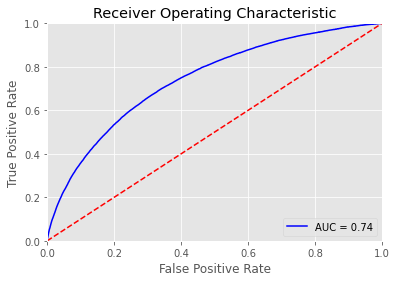

In [92]:
#строим ROC кривую
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [93]:
# нормализация тестовой выборки:
x_test_new = norm.transform(x_test)
x_test_new = pd.DataFrame(x_test_new, index = x_test.index, columns = x_test.columns)
x_test_new.tail()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
48739,0.0,0.0,0.0,1.0,0.000000,0.000819,0.091775,0.061846,0.057239,1.000000,1.000000,1.00,1.0,0.2,0.024260,0.296449,0.711423,0.631404,0.527720,1.0,1.0,1.0,1.0,1.0,0.0,0.470588,0.000000,1.0,1.0,1.000000,0.695652,0.0,0.0,0.0,0.0,0.0,0.0,0.578947,0.758567,0.717489,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0707,0.0,0.002874,0.0,0.002907,0.0,0.840634,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.04
48740,0.0,0.0,0.0,0.0,0.105263,0.001127,0.144173,0.118147,0.113356,1.000000,0.142857,1.00,0.2,0.2,0.491595,0.791601,0.935853,0.877797,0.582743,1.0,1.0,0.0,1.0,0.0,0.0,0.823529,0.157895,0.5,0.5,0.166667,0.478261,0.0,0.0,0.0,0.0,1.0,1.0,0.894737,0.800697,0.579096,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0707,0.0,0.005747,0.0,0.005814,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.08
48741,0.0,0.0,1.0,1.0,0.052632,0.001512,0.067416,0.123201,0.068462,1.000000,0.142857,1.00,0.2,0.2,0.361433,0.524634,0.830449,0.891334,0.791024,1.0,1.0,0.0,1.0,1.0,0.0,0.470588,0.105263,0.5,0.5,1.000000,0.521739,0.0,0.0,0.0,0.0,0.0,0.0,0.087719,0.740082,0.316237,0.9955,0.3333,0.9955,0.3333,0.9955,0.3333,0.1663,0.0,0.000000,0.0,0.000000,0.0,0.804753,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011494,0.04
48742,0.0,0.5,0.0,0.0,0.000000,0.001704,0.101124,0.091699,0.102132,0.166667,0.142857,0.25,0.2,0.2,0.257000,0.634780,0.847532,0.940783,0.810477,1.0,1.0,1.0,1.0,1.0,0.0,0.588235,0.052632,0.5,0.5,0.166667,0.434783,0.0,1.0,1.0,0.0,1.0,1.0,0.736842,0.521288,0.664367,0.9896,0.6250,0.9896,0.6250,0.9896,0.6250,0.1974,0.0,0.000000,0.0,0.000000,0.0,0.462255,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.08
48743,0.0,0.0,1.0,0.0,0.000000,0.000935,0.066858,0.090067,0.057239,1.000000,1.000000,1.00,0.2,0.2,0.087776,0.635118,0.964661,0.956550,0.413645,1.0,1.0,1.0,1.0,0.0,0.0,0.176471,0.052632,0.5,0.5,0.833333,0.608696,0.0,0.0,0.0,0.0,0.0,0.0,0.192982,0.533966,0.303307,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0707,0.0,0.000000,0.0,0.000000,0.0,0.923812,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003831,0.16


In [94]:
#записываем прогноз
pred_prob = model.predict_proba(x_test_new)
prediction = pred_prob[:,1]

sample_submission['TARGET'] = prediction
sample_submission.tail()

,SK_ID_CURR,TARGET
48739,456221,0.039977
48740,456222,0.068988
48741,456223,0.065658
48742,456224,0.042550
48743,456250,0.150441


In [95]:
#кладем результат в файл:
sample_submission.to_csv('submission4.csv', index = None)

### Public Score: 0.73104
### Private Score: 0.72412

# Model 2

In [96]:
df = train.append(test)
df.drop(['SK_ID_CURR'], axis = 1, inplace = True)
df.tail()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
48739,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.002042,-19970,-5169.0,-9094.0,-3399,1,1,1,1,1,0,Laborers,1.0,3,3,WEDNESDAY,16,0,0,0,0,0,0,Other,0.648575,0.643026,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0707,No,1.0,0.0,1.0,0.0,-684.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.035792,-11186,-1149.0,-3015.0,-3003,1,1,0,1,0,0,Sales staff,4.0,2,2,MONDAY,11,0,0,0,0,1,1,Trade: type 7,0.684596,0.519097,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0707,No,2.0,0.0,2.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
48741,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.026392,-15922,-3037.0,-2681.0,-1504,1,1,0,1,1,0,Laborers,3.0,2,2,WEDNESDAY,12,0,0,0,0,0,0,Business Entity Type 3,0.632770,0.283712,0.9955,0.3333,0.9955,0.3333,0.9955,0.3333,0.1663,No,0.0,0.0,0.0,0.0,-838.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,Family,Commercial associate,Higher education,Married,House / apartment,0.018850,-13968,-2731.0,-1461.0,-1364,1,1,1,1,1,0,Managers,2.0,2,2,MONDAY,10,0,1,1,0,1,1,Self-employed,0.445701,0.595456,0.9896,0.6250,0.9896,0.6250,0.9896,0.6250,0.1974,No,0.0,0.0,0.0,0.0,-2308.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
48743,Cash loans,F,Y,N,0,135000.0,312768.0,24709.5,270000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.006629,-13962,-633.0,-1072.0,-4220,1,1,1,1,0,0,Core staff,2.0,2,2,TUESDAY,14,0,0,0,0,0,0,Government,0.456541,0.272134,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0707,No,0.0,0.0,0.0,0.0,-327.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


In [97]:
df.shape

(356255, 79)

Закодируем все категориальные переменные с помощью One Hot Encoding 

In [98]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
df = pd.get_dummies(df, columns= categorical_columns, dummy_na= True)
df.tail()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_nan,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,CODE_GENDER_nan,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_CAR_nan,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,FLAG_OWN_REALTY_nan,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_nan,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_nan,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,...,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_nan,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_nan,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_nan,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,WEEKDAY_APPR_PROCESS_START_nan,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATIO

In [99]:
df.shape

(356255, 205)

In [100]:
x_train = df[:307511]
x_test = df[307511:]

In [101]:
# нормализация переменных
norm = preprocessing.MinMaxScaler()
norm.fit(x_train)

#преобразование данных
x_train_new = norm.transform(x_train)
x_train_new = pd.DataFrame(x_train_new, index = x_train.index, columns = x_train.columns)
x_train_new.tail()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_nan,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,CODE_GENDER_nan,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_CAR_nan,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,FLAG_OWN_REALTY_nan,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_nan,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_nan,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,...,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_nan,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_nan,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_nan,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,WEEKDAY_APPR_PROCESS_START_nan,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATIO

In [102]:
kfold(x_train_new, y)

0 0.7438131379509407
1 0.7426299670733233
2 0.7406894808863809
3 0.7400862235691379
4 0.7449245136328028


0.7424286646225171

In [103]:
model.fit(x_train_new, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
# нормализация тестовой выборки:
x_test_new = norm.transform(x_test)
x_test_new = pd.DataFrame(x_test_new, index = x_test.index, columns = x_test.columns)
x_test_new.tail()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_nan,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,CODE_GENDER_nan,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_CAR_nan,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,FLAG_OWN_REALTY_nan,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_nan,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_nan,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,...,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_nan,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_nan,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_nan,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,WEEKDAY_APPR_PROCESS_START_nan,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATIO

In [105]:
#записываем прогноз
pred_prob = model.predict_proba(x_test_new)
prediction = pred_prob[:,1]

sample_submission['TARGET'] = prediction
sample_submission.head()

,SK_ID_CURR,TARGET
0,100001,0.071587
1,100005,0.225442
2,100013,0.044904
3,100028,0.034779
4,100038,0.102307


In [106]:
#кладем результат в файл:
sample_submission.to_csv('submission5.csv', index = None)

### Public Score: 0.73400
### Private Score: 0.72771

# Model 3

In [107]:
df = train.append(test)
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
df = pd.get_dummies(df, columns= categorical_columns, dummy_na= True)
df.tail()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_nan,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,CODE_GENDER_nan,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_CAR_nan,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,FLAG_OWN_REALTY_nan,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_nan,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_nan,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,...,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_nan,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_nan,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_nan,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,WEEKDAY_APPR_PROCESS_START_nan,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,O

Увеличим количество переменных, добавив новые таблицы.

### Bureau

In [108]:
bureau = pd.read_csv('bureau.csv', nrows = None)
bureau.tail()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN
1716427,246829,5057778,Closed,currency 1,-463,0,NaN,-387.0,NaN,0,22500.00,0.0,NaN,0.0,Microloan,-387,NaN


In [109]:
#смотрим на пропуски
missing_values = missing_values_table(bureau)

#удалим столбцы с пропусками более 50%
mis_val_table_ren_columns = missing_values.loc[missing_values['% of Total Values'] > 50]
bureau = bureau.drop(mis_val_table_ren_columns.index, axis=1)

#разбиваем переменные на 2 типа
cat = []
num = []

for i in bureau.columns:
    if bureau[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

print("Categorical: " + str(len(cat)))
print("Numerical: " + str(len(num)))

#заполняем пропуски
most_freq_cat_nans = [] 
for i in cat:
    most_freq_cat_nans.append(bureau[i].value_counts().idxmax())
    
for i in range(len(cat)):
    bureau[cat[i]].fillna(most_freq_cat_nans[i], inplace=True)
    
for i in num:
    bureau[i].fillna(bureau[i].median(), inplace=True)

print(bureau.isna().sum().max()) 

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.
Categorical: 3
Numerical: 12
0


In [110]:
categorical_columns = [col for col in bureau.columns if bureau[col].dtype == 'object']
bureau = pd.get_dummies(bureau, columns= categorical_columns, dummy_na= True)

bureau_avg = bureau.groupby('SK_ID_CURR', as_index = False).mean()
bureau_avg.tail()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_ACTIVE_nan,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_CURRENCY_nan,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,CREDIT_TYPE_nan
305806,456249,5371700.0,-1667.076923,0.0,-1162.923077,-1328.769231,0.000000,2.841430e+05,12543.923077,0.000,0.0,-1064.538462,0.153846,0.0,0.846154,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.692308,0.230769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
305807,456250,6817237.0,-862.000000,0.0,1288.333333,-851.333333,0.000000,1.028820e+06,744013.365000,19422.795,0.0,-60.333333,0.666667,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
305808,456253,5885018.5,-867.500000,0.0,280.500000,-845.500000,0.000000,9.900000e+05,448958.250000,0.000,0.0,-253.250000,0.500000,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.750000,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
305809,456254,6669849.0,-1104.000000,0.0,-859.000000,-859.000000,0.000000,4.500000e+04,0.000000,0.000,0.0,-401.000000,0.000000,0.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
305810,456255,5126332.0,-1089.454545,0.0,3231.272727,-935.909091,0.090909,3.456290e+05,139537.546364,0.000,0.0,-531.090909,0.454545,0.0,0.545455,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.818182,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
df = df.merge(bureau_avg, how='left', on='SK_ID_CURR')
print(df.shape)

(356255, 243)


### POS_CASH_balance

In [112]:
pos = pd.read_csv('POS_CASH_balance.csv', nrows = None)
pos.tail()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0
10001357,1259607,174278,-52,16.0,0.0,Completed,0,0


In [113]:
#смотрим на пропуски
missing_values = missing_values_table(pos)

#удалим столбцы с пропусками более 50%
mis_val_table_ren_columns = missing_values.loc[missing_values['% of Total Values'] > 50]
pos = pos.drop(mis_val_table_ren_columns.index, axis=1)

#разбиваем переменные на 2 типа
cat = []
num = []

for i in pos.columns:
    if pos[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

print("Categorical: " + str(len(cat)))
print("Numerical: " + str(len(num)))

#заполняем пропуски
most_freq_cat_nans = [] 
for i in cat:
    most_freq_cat_nans.append(pos[i].value_counts().idxmax())
    
for i in range(len(cat)):
    pos[cat[i]].fillna(most_freq_cat_nans[i], inplace=True)
    
for i in num:
    pos[i].fillna(pos[i].median(), inplace=True)

print(pos.isna().sum().max()) 

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.
Categorical: 1
Numerical: 7
0


In [114]:
categorical_columns = [col for col in pos.columns if pos[col].dtype == 'object']
pos = pd.get_dummies(pos, columns= categorical_columns, dummy_na= True)

pos_avg = pos.groupby('SK_ID_CURR', as_index = False).mean()

In [115]:
df = df.merge(pos_avg, how='left', on='SK_ID_CURR')
print(df.shape)

(356255, 259)


### Credit_card_balance

In [116]:
cc = pd.read_csv('credit_card_balance.csv', nrows = None)
cc.tail()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.0,NaN,0.000,0.00,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.0,1879.11,0.000,0.00,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.0,375750.00,356994.675,269356.14,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.0,NaN,0.000,0.00,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840311,2411345,236760,-10,0.000,157500,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.000,0.000,0.0,0,0.0,0.0,21.0,Completed,0,0


In [117]:
#смотрим на пропуски
missing_values = missing_values_table(cc)

#удалим столбцы с пропусками более 50%
mis_val_table_ren_columns = missing_values.loc[missing_values['% of Total Values'] > 50]
cc = cc.drop(mis_val_table_ren_columns.index, axis=1)

#разбиваем переменные на 2 типа
cat = []
num = []

for i in cc.columns:
    if cc[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

print("Categorical: " + str(len(cat)))
print("Numerical: " + str(len(num)))

#заполняем пропуски
most_freq_cat_nans = [] 
for i in cat:
    most_freq_cat_nans.append(cc[i].value_counts().idxmax())
    
for i in range(len(cat)):
    cc[cat[i]].fillna(most_freq_cat_nans[i], inplace=True)
    
for i in num:
    cc[i].fillna(cc[i].median(), inplace=True)

print(cc.isna().sum().max()) 

Your selected dataframe has 23 columns.
There are 9 columns that have missing values.
Categorical: 1
Numerical: 22
0


In [118]:
categorical_columns = [col for col in cc.columns if cc[col].dtype == 'object']
cc = pd.get_dummies(cc, columns= categorical_columns, dummy_na= True)

cc_avg = cc.groupby('SK_ID_CURR', as_index = False).mean()

In [119]:
df = df.merge(cc_avg, how='left', on='SK_ID_CURR')
print(df.shape)

(356255, 288)


Удалим пропуски в общей таблице и столбец SK_ID_CURR:

In [120]:
for i in df.columns:
    df[i].fillna(df[i].median(), inplace=True)

print(df.isna().sum().max()) 
df.drop(['SK_ID_CURR'], axis=1, inplace = True)
df.tail()

0


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_nan,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,CODE_GENDER_nan,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_CAR_nan,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,FLAG_OWN_REALTY_nan,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_nan,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_nan,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,...,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,ORGANIZATION_TYPE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_ACTIVE_nan,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_CURRENCY_nan,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,CREDIT_TYPE_nan,SK_ID_PREV_x,MONTHS_BALANCE_x,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD_x,SK_DPD_DEF_x,NAME_CONTRACT_STATUS_Active_x,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved_x,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed_x,NAME_CONTRACT_STATUS_Demand_x,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed_x,NAME_CONTRACT_STATUS_X

In [121]:
x_train = df[:307511]
x_test = df[307511:]

In [122]:
x_train.shape, y.shape

((307511, 287), (307511,))

In [123]:
from sklearn import preprocessing
# нормализация переменных
norm = preprocessing.MinMaxScaler()
norm.fit(x_train)

#преобразование данных
x_train_new = norm.transform(x_train)
x_train_new = pd.DataFrame(x_train_new, index = x_train.index, columns = x_train.columns)
x_train_new.tail()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_nan,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,CODE_GENDER_nan,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_CAR_nan,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,FLAG_OWN_REALTY_nan,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_nan,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_nan,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,...,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,ORGANIZATION_TYPE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_ACTIVE_nan,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_CURRENCY_nan,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,CREDIT_TYPE_nan,SK_ID_PREV_x,MONTHS_BALANCE_x,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD_x,SK_DPD_DEF_x,NAME_CONTRACT_STATUS_Active_x,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved_x,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed_x,NAME_CONTRACT_STATUS_Demand_x,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed_x,NAME_CONTRACT_STATUS_X

In [124]:
kfold(x_train_new, y)

0 0.7542593862568479
1 0.7530949720746409
2 0.7525129876407631
3 0.7508060590396642
4 0.7567511163318187


0.753484904268747

In [125]:
model.fit(x_train_new, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
# нормализация тестовой выборки:
x_test_new = norm.transform(x_test)
x_test_new = pd.DataFrame(x_test_new, index = x_test.index, columns = x_test.columns)
x_test_new.tail()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_nan,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,CODE_GENDER_nan,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_CAR_nan,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,FLAG_OWN_REALTY_nan,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_nan,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_nan,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,...,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,ORGANIZATION_TYPE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_ACTIVE_nan,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_CURRENCY_nan,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,CREDIT_TYPE_nan,SK_ID_PREV_x,MONTHS_BALANCE_x,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD_x,SK_DPD_DEF_x,NAME_CONTRACT_STATUS_Active_x,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved_x,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed_x,NAME_CONTRACT_STATUS_Demand_x,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed_x,NAME_CONTRACT_STATUS_X

In [127]:
#записываем прогноз
pred_prob = model.predict_proba(x_test_new)
prediction = pred_prob[:,1]

sample_submission['TARGET'] = prediction
sample_submission.head()

,SK_ID_CURR,TARGET
0,100001,0.062100
1,100005,0.193805
2,100013,0.035486
3,100028,0.023184
4,100038,0.098368


In [128]:
#кладем результат в файл:
sample_submission.to_csv('submission6.csv', index = None)

### Public Score: 0.74642
### Private Score: 0.74176

# Model 4

Напишем функцию для рассчета Information Value и Weight of Evidence:

In [129]:
x_train['TARGET'] = y
x_train.shape

c:\users\влад\downloads\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(307511, 288)

In [130]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [131]:
iv, woe = iv_woe(data = x_train, target = 'TARGET', bins=10, show_woe = True)

Information value of CNT_CHILDREN is 0.001669
       Variable         Cutoff       N  Events  % of Events  Non-Events  \
0  CNT_CHILDREN  (-0.001, 1.0]  276490   22063     0.888741      254427   
1  CNT_CHILDREN     (1.0, 2.0]   26749    2333     0.093978       24416   
2  CNT_CHILDREN    (2.0, 19.0]    4272     429     0.017281        3843   

   % of Non-Events       WoE        IV  
0         0.900034 -0.012626  0.000143  
1         0.086371  0.084402  0.000642  
2         0.013595  0.239934  0.000884  
Information value of AMT_INCOME_TOTAL is 0.010758
           Variable                   Cutoff      N  Events  % of Events  \
0  AMT_INCOME_TOTAL     (25649.999, 81000.0]  33391    2735     0.110171   
1  AMT_INCOME_TOTAL       (81000.0, 99000.0]  30280    2490     0.100302   
2  AMT_INCOME_TOTAL      (99000.0, 112500.0]  36907    3218     0.129627   
3  AMT_INCOME_TOTAL     (112500.0, 135000.0]  48849    4147     0.167049   
4  AMT_INCOME_TOTAL     (135000.0, 147150.0]   4333     390

Information value of DAYS_REGISTRATION is 0.026872
            Variable                 Cutoff      N  Events  % of Events  \
0  DAYS_REGISTRATION  (-24672.001, -9932.0]  30753    1725     0.069486   
1  DAYS_REGISTRATION     (-9932.0, -8230.0]  30754    2037     0.082054   
2  DAYS_REGISTRATION     (-8230.0, -6776.0]  30753    2231     0.089869   
3  DAYS_REGISTRATION     (-6776.0, -5459.0]  30761    2435     0.098087   
4  DAYS_REGISTRATION     (-5459.0, -4504.0]  30748    2670     0.107553   
5  DAYS_REGISTRATION     (-4504.0, -3537.0]  30743    2673     0.107674   
6  DAYS_REGISTRATION     (-3537.0, -2540.0]  30753    2675     0.107754   
7  DAYS_REGISTRATION     (-2540.0, -1491.0]  30783    2617     0.105418   
8  DAYS_REGISTRATION      (-1491.0, -690.0]  30739    2780     0.111984   
9  DAYS_REGISTRATION          (-690.0, 0.0]  30724    2982     0.120121   

   Non-Events  % of Non-Events       WoE        IV  
0       29028         0.102686 -0.390548  0.012966  
1       28717    

1       11447         0.040494  0.049246  0.000101  
Information value of REG_CITY_NOT_LIVE_CITY is 0.022299
                 Variable  Cutoff       N  Events  % of Events  Non-Events  \
0  REG_CITY_NOT_LIVE_CITY       0  283472   21886     0.881611      261586   
1  REG_CITY_NOT_LIVE_CITY       1   24039    2939     0.118389       21100   

   % of Non-Events       WoE        IV  
0         0.925359 -0.048430  0.002119  
1         0.074641  0.461282  0.020180  
Information value of REG_CITY_NOT_WORK_CITY is 0.032207
                 Variable  Cutoff       N  Events  % of Events  Non-Events  \
0  REG_CITY_NOT_WORK_CITY       0  236644   17305      0.69708      219339   
1  REG_CITY_NOT_WORK_CITY       1   70867    7520      0.30292       63347   

   % of Non-Events       WoE        IV  
0          0.77591 -0.107137  0.008446  
1          0.22409  0.301424  0.023762  
Information value of LIVE_CITY_NOT_WORK_CITY is 0.013228
                  Variable  Cutoff       N  Events  % of Event

3         0.068557 -0.499289  0.013454  
Information value of TOTALAREA_MODE is 0.031773
         Variable            Cutoff       N  Events  % of Events  Non-Events  \
0  TOTALAREA_MODE   (-0.001, 0.031]   30773    2732     0.110050       28041   
1  TOTALAREA_MODE   (0.031, 0.0559]   30835    2171     0.087452       28664   
2  TOTALAREA_MODE  (0.0559, 0.0688]  166547   14987     0.603706      151560   
3  TOTALAREA_MODE   (0.0688, 0.086]   17861    1280     0.051561       16581   
4  TOTALAREA_MODE    (0.086, 0.162]   30767    1942     0.078228       28825   
5  TOTALAREA_MODE      (0.162, 1.0]   30728    1713     0.069003       29015   

   % of Non-Events       WoE        IV  
0         0.099195  0.103852  0.001127  
1         0.101399 -0.147969  0.002064  
2         0.536143  0.118687  0.008019  
3         0.058655 -0.128912  0.000915  
4         0.101968 -0.265039  0.006292  
5         0.102640 -0.397081  0.013357  
Information value of OBS_30_CNT_SOCIAL_CIRCLE is 0.001549
     

Information value of FLAG_DOCUMENT_6 is 0.012824
          Variable  Cutoff       N  Events  % of Events  Non-Events  \
0  FLAG_DOCUMENT_6       0  280433   23318     0.939295      257115   
1  FLAG_DOCUMENT_6       1   27078    1507     0.060705       25571   

   % of Non-Events       WoE        IV  
0         0.909543  0.032188  0.000958  
1         0.090457 -0.398852  0.011867  
Information value of FLAG_DOCUMENT_7 is 3.8e-05
          Variable  Cutoff       N  Events  % of Events  Non-Events  \
0  FLAG_DOCUMENT_7       0  307452   24822     0.999879      282630   
1  FLAG_DOCUMENT_7       1      59       3     0.000121          56   

   % of Non-Events       WoE            IV  
0         0.999802  0.000077  5.969092e-09  
1         0.000198 -0.494254  3.818296e-05  
Information value of FLAG_DOCUMENT_8 is 0.000906
          Variable  Cutoff       N  Events  % of Events  Non-Events  \
0  FLAG_DOCUMENT_8       0  282487   22989     0.926042      259498   
1  FLAG_DOCUMENT_8       1

Information value of AMT_REQ_CREDIT_BUREAU_WEEK is 0.000145
                     Variable  Cutoff       N  Events  % of Events  \
0  AMT_REQ_CREDIT_BUREAU_WEEK     0.0  298975   24157     0.973092   
1  AMT_REQ_CREDIT_BUREAU_WEEK     1.0    8208     638     0.025700   
2  AMT_REQ_CREDIT_BUREAU_WEEK     2.0     199      20     0.000806   
3  AMT_REQ_CREDIT_BUREAU_WEEK     3.0      58       4     0.000161   
4  AMT_REQ_CREDIT_BUREAU_WEEK     4.0      34       4     0.000161   
5  AMT_REQ_CREDIT_BUREAU_WEEK     5.0      10       1     0.000040   
6  AMT_REQ_CREDIT_BUREAU_WEEK     6.0      20       1     0.000040   
7  AMT_REQ_CREDIT_BUREAU_WEEK     7.0       2       0     0.000020   
8  AMT_REQ_CREDIT_BUREAU_WEEK     8.0       5       0     0.000020   

   Non-Events  % of Non-Events       WoE            IV  
0      274818         0.972167  0.000951  8.790251e-07  
1        7570         0.026779 -0.041125  4.437047e-05  
2         179         0.000633  0.240832  4.152620e-05  
3          

                  Variable  Cutoff       N  Events  % of Events  Non-Events  \
0  NAME_TYPE_SUITE_Other_A       0  306645   24749     0.996939      281896   
1  NAME_TYPE_SUITE_Other_A       1     866      76     0.003061         790   

   % of Non-Events       WoE            IV  
0         0.997205 -0.000268  7.139654e-08  
1         0.002795  0.091186  2.432930e-05  
Information value of NAME_TYPE_SUITE_Other_B is 0.000297
                  Variable  Cutoff       N  Events  % of Events  Non-Events  \
0  NAME_TYPE_SUITE_Other_B       0  305741   24651     0.992991      281090   
1  NAME_TYPE_SUITE_Other_B       1    1770     174     0.007009        1596   

   % of Non-Events       WoE        IV  
0         0.994354 -0.001372  0.000002  
1         0.005646  0.216285  0.000295  
Information value of NAME_TYPE_SUITE_Spouse, partner is 2.9e-05
                          Variable  Cutoff       N  Events  % of Events  \
0  NAME_TYPE_SUITE_Spouse, partner       0  296141   23930     0.96394

Information value of NAME_FAMILY_STATUS_Separated is 1.8e-05
                       Variable  Cutoff       N  Events  % of Events  \
0  NAME_FAMILY_STATUS_Separated       0  287741   23205     0.934743   
1  NAME_FAMILY_STATUS_Separated       1   19770    1620     0.065257   

   Non-Events  % of Non-Events       WoE        IV  
0      264536         0.935794 -0.001124  0.000001  
1       18150         0.064206  0.016241  0.000017  
Information value of NAME_FAMILY_STATUS_Single / not married is 0.008807
                                  Variable  Cutoff       N  Events  \
0  NAME_FAMILY_STATUS_Single / not married       0  262067   20368   
1  NAME_FAMILY_STATUS_Single / not married       1   45444    4457   

   % of Events  Non-Events  % of Non-Events       WoE        IV  
0     0.820463      241699         0.855009 -0.041243  0.001425  
1     0.179537       40987         0.144991  0.213706  0.007383  
Information value of NAME_FAMILY_STATUS_Unknown is 1.4e-05
                     V

Information value of OCCUPATION_TYPE_Medicine staff is 0.00106
                         Variable  Cutoff       N  Events  % of Events  \
0  OCCUPATION_TYPE_Medicine staff       0  298974   24253     0.976959   
1  OCCUPATION_TYPE_Medicine staff       1    8537     572     0.023041   

   Non-Events  % of Non-Events       WoE        IV  
0      274721         0.971824  0.005270  0.000027  
1        7965         0.028176 -0.201188  0.001033  
Information value of OCCUPATION_TYPE_Private service staff is 0.000376
                                Variable  Cutoff       N  Events  % of Events  \
0  OCCUPATION_TYPE_Private service staff       0  304859   24650     0.992951   
1  OCCUPATION_TYPE_Private service staff       1    2652     175     0.007049   

   Non-Events  % of Non-Events       WoE        IV  
0      280209         0.991238  0.001727  0.000003  
1        2477         0.008762 -0.217532  0.000373  
Information value of OCCUPATION_TYPE_Realty agents is 2e-06
                     

Information value of ORGANIZATION_TYPE_Construction is 0.004465
                         Variable  Cutoff       N  Events  % of Events  \
0  ORGANIZATION_TYPE_Construction       0  300790   24040     0.968379   
1  ORGANIZATION_TYPE_Construction       1    6721     785     0.031621   

   Non-Events  % of Non-Events       WoE        IV  
0      276750         0.979001 -0.010910  0.000116  
1        5936         0.020999  0.409378  0.004349  
Information value of ORGANIZATION_TYPE_Culture is 0.00017
                    Variable  Cutoff       N  Events  % of Events  Non-Events  \
0  ORGANIZATION_TYPE_Culture       0  307132   24804     0.999154      282328   
1  ORGANIZATION_TYPE_Culture       1     379      21     0.000846         358   

   % of Non-Events       WoE            IV  
0         0.998734  0.000421  1.770084e-07  
1         0.001266 -0.403525  1.696828e-04  
Information value of ORGANIZATION_TYPE_Electricity is 0.000128
                        Variable  Cutoff       N  Even

Information value of ORGANIZATION_TYPE_Industry: type 9 is 0.000424
                             Variable  Cutoff       N  Events  % of Events  \
0  ORGANIZATION_TYPE_Industry: type 9       0  304143   24600     0.990937   
1  ORGANIZATION_TYPE_Industry: type 9       1    3368     225     0.009063   

   Non-Events  % of Non-Events       WoE        IV  
0      279543         0.988882  0.002076  0.000004  
1        3143         0.011118 -0.204347  0.000420  
Information value of ORGANIZATION_TYPE_Insurance is 0.000233
                      Variable  Cutoff       N  Events  % of Events  \
0  ORGANIZATION_TYPE_Insurance       0  306914   24791      0.99863   
1  ORGANIZATION_TYPE_Insurance       1     597      34      0.00137   

   Non-Events  % of Non-Events       WoE            IV  
0      282123         0.998008  0.000623  3.875627e-07  
1         563         0.001992 -0.374434  2.329059e-04  
Information value of ORGANIZATION_TYPE_Kindergarten is 0.000476
                         Var

1         0.001885 -0.061846  6.993414e-06  
Information value of ORGANIZATION_TYPE_Trade: type 1 is 1.4e-05
                          Variable  Cutoff       N  Events  % of Events  \
0  ORGANIZATION_TYPE_Trade: type 1       0  307163   24794     0.998751   
1  ORGANIZATION_TYPE_Trade: type 1       1     348      31     0.001249   

   Non-Events  % of Non-Events       WoE            IV  
0      282369         0.998879 -0.000128  1.623870e-08  
1         317         0.001121  0.107571  1.369977e-05  
Information value of ORGANIZATION_TYPE_Trade: type 2 is 0.000139
                          Variable  Cutoff       N  Events  % of Events  \
0  ORGANIZATION_TYPE_Trade: type 2       0  305611   24692     0.994642   
1  ORGANIZATION_TYPE_Trade: type 2       1    1900     133     0.005358   

   Non-Events  % of Non-Events       WoE            IV  
0      280919         0.993749  0.000898  8.025523e-07  
1        1767         0.006251 -0.154204  1.377424e-04  
Information value of ORGANIZATIO

      Variable                  Cutoff      N  Events  % of Events  \
0  DAYS_CREDIT  (-2922.001, -1746.167]  30752    1538     0.061954   
1  DAYS_CREDIT    (-1746.167, -1464.1]  30752    1574     0.063404   
2  DAYS_CREDIT      (-1464.1, -1270.0]  30763    1741     0.070131   
3  DAYS_CREDIT      (-1270.0, -1098.5]  30753    1941     0.078187   
4  DAYS_CREDIT      (-1098.5, -1052.5]  52394    5029     0.202578   
5  DAYS_CREDIT    (-1052.5, -1002.875]   9094     626     0.025217   
6  DAYS_CREDIT   (-1002.875, -826.714]  30752    2317     0.093333   
7  DAYS_CREDIT      (-826.714, -634.5]  30769    2755     0.110977   
8  DAYS_CREDIT        (-634.5, -406.0]  30772    3180     0.128097   
9  DAYS_CREDIT           (-406.0, 0.0]  30710    4124     0.166123   

   Non-Events  % of Non-Events       WoE        IV  
0       29214         0.103344 -0.511680  0.021179  
1       29178         0.103217 -0.487309  0.019401  
2       29022         0.102665 -0.381109  0.012399  
3       28812    

Information value of DAYS_CREDIT_UPDATE is 0.090383
             Variable                 Cutoff      N  Events  % of Events  \
0  DAYS_CREDIT_UPDATE  (-41890.001, -1044.6]  30752    1514     0.060987   
1  DAYS_CREDIT_UPDATE    (-1044.6, -804.357]  30751    1673     0.067392   
2  DAYS_CREDIT_UPDATE   (-804.357, -647.625]  30751    1773     0.071420   
3  DAYS_CREDIT_UPDATE   (-647.625, -517.333]  30751    2120     0.085398   
4  DAYS_CREDIT_UPDATE     (-517.333, -479.3]  53365    5130     0.206647   
5  DAYS_CREDIT_UPDATE     (-479.3, -446.333]   8138     572     0.023041   
6  DAYS_CREDIT_UPDATE     (-446.333, -322.0]  30778    2393     0.096395   
7  DAYS_CREDIT_UPDATE       (-322.0, -189.0]  30767    2824     0.113756   
8  DAYS_CREDIT_UPDATE        (-189.0, -50.5]  30744    3275     0.131923   
9  DAYS_CREDIT_UPDATE          (-50.5, 14.0]  30714    3551     0.143041   

   Non-Events  % of Non-Events       WoE        IV  
0       29238         0.103429 -0.528229  0.022419  
1    

Information value of CREDIT_TYPE_Credit card is 0.023872
                  Variable            Cutoff      N  Events  % of Events  \
0  CREDIT_TYPE_Credit card  (-0.001, 0.0667]  92569    6465     0.260423   
1  CREDIT_TYPE_Credit card   (0.0667, 0.167]  32857    2176     0.087654   
2  CREDIT_TYPE_Credit card      (0.167, 0.2]  59707    5575     0.224572   
3  CREDIT_TYPE_Credit card      (0.2, 0.286]  31592    2340     0.094260   
4  CREDIT_TYPE_Credit card    (0.286, 0.375]  29772    2546     0.102558   
5  CREDIT_TYPE_Credit card      (0.375, 0.5]  35617    3258     0.131239   
6  CREDIT_TYPE_Credit card        (0.5, 1.0]  25397    2465     0.099295   

   Non-Events  % of Non-Events       WoE        IV  
0       86104         0.304592 -0.156667  0.006920  
1       30681         0.108534 -0.213670  0.004461  
2       54132         0.191492  0.159352  0.005271  
3       29252         0.103479 -0.093311  0.000860  
4       27226         0.096312  0.062837  0.000392  
5       32359   

Information value of CNT_INSTALMENT is 0.010447
         Variable          Cutoff      N  Events  % of Events  Non-Events  \
0  CNT_INSTALMENT    (0.999, 6.5]  30949    2631     0.105982       28318   
1  CNT_INSTALMENT    (6.5, 9.016]  30554    2184     0.087976       28370   
2  CNT_INSTALMENT   (9.016, 10.0]  33632    2582     0.104008       31050   
3  CNT_INSTALMENT  (10.0, 11.271]  27870    1980     0.079758       25890   
4  CNT_INSTALMENT  (11.271, 12.0]  55004    4661     0.187754       50343   
5  CNT_INSTALMENT  (12.0, 12.914]   6500     472     0.019013        6028   
6  CNT_INSTALMENT  (12.914, 16.5]  30862    2254     0.090796       28608   
7  CNT_INSTALMENT    (16.5, 20.0]  31091    2502     0.100785       28589   
8  CNT_INSTALMENT  (20.0, 24.207]  30303    2586     0.104169       27717   
9  CNT_INSTALMENT  (24.207, 72.0]  30746    2973     0.119758       27773   

   % of Non-Events       WoE        IV  
0         0.100175  0.056352  0.000327  
1         0.100359 -0.

Information value of NAME_CONTRACT_STATUS_nan_x is 0.0
                     Variable  Cutoff       N  Events  % of Events  \
0  NAME_CONTRACT_STATUS_nan_x     0.0  307511   24825          1.0   

   Non-Events  % of Non-Events  WoE   IV  
0      282686              1.0  0.0  0.0  
Information value of SK_ID_PREV_y is 0.002087
       Variable                    Cutoff       N  Events  % of Events  \
0  SK_ID_PREV_y  (1000017.999, 1618899.0]   30752    2653     0.106868   
1  SK_ID_PREV_y    (1618899.0, 1898427.5]  233405   18393     0.740906   
2  SK_ID_PREV_y    (1898427.5, 2173966.0]   12603    1108     0.044632   
3  SK_ID_PREV_y    (2173966.0, 2843493.0]   30751    2671     0.107593   

   Non-Events  % of Non-Events       WoE        IV  
0       28099         0.099400  0.072443  0.000541  
1      215012         0.760604 -0.026238  0.000517  
2       11495         0.040663  0.093130  0.000370  
3       28080         0.099333  0.079881  0.000660  
Information value of MONTHS_BALANCE_

Information value of AMT_TOTAL_RECEIVABLE is 0.039995
               Variable                           Cutoff       N  Events  \
0  AMT_TOTAL_RECEIVABLE  (-2930.2340000000004, 3274.528]   30752    1747   
1  AMT_TOTAL_RECEIVABLE            (3274.528, 24770.597]  232518   18089   
2  AMT_TOTAL_RECEIVABLE           (24770.597, 62180.542]   13490    1229   
3  AMT_TOTAL_RECEIVABLE          (62180.542, 913096.639]   30751    3760   

   % of Events  Non-Events  % of Non-Events       WoE        IV  
0     0.070373       29005         0.102605 -0.377083  0.012154  
1     0.728661      214429         0.758541 -0.040189  0.001201  
2     0.049507       12261         0.043373  0.132263  0.000811  
3     0.151460       26991         0.095480  0.461401  0.025829  
Information value of CNT_DRAWINGS_ATM_CURRENT is 0.039504
                   Variable            Cutoff       N  Events  % of Events  \
0  CNT_DRAWINGS_ATM_CURRENT  (-0.001, 0.0753]  263235   19842     0.799275   
1  CNT_DRAWINGS_ATM_C

In [132]:
#оставляем переменные с информационной ценностью не менее 0.01
bad_columns = iv.loc[iv['IV'] < 0.01]

x_train = x_train.drop(bad_columns['Variable'], axis=1)
x_test = x_test.drop(bad_columns['Variable'], axis=1)
x_train.shape, x_test.shape

((307511, 74), (48744, 73))

In [133]:
x_train = x_train.drop(['TARGET'], axis=1)

In [134]:
from sklearn import preprocessing
# нормализация переменных
norm = preprocessing.MinMaxScaler()
norm.fit(x_train)

#преобразование данных
x_train_new = norm.transform(x_train)
x_train_new = pd.DataFrame(x_train_new, index = x_train.index, columns = x_train.columns)

# нормализация тестовой выборки:
x_test_new = norm.transform(x_test)
x_test_new = pd.DataFrame(x_test_new, index = x_test.index, columns = x_test.columns)

In [135]:
kfold(x_train_new, y)

0 0.7465346127344406
1 0.7443050714437249
2 0.7449037975012001
3 0.7434660135904825
4 0.7473730832473574


0.7453165157034412

In [136]:
model.fit(x_train_new, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
#записываем прогноз
pred_prob = model.predict_proba(x_test_new)
prediction = pred_prob[:,1]

sample_submission['TARGET'] = prediction

#кладем результат в файл:
sample_submission.to_csv('submission7.csv', index = None)

Результаты стали несколько хуже, но при этом переменных стало существенно меньше, что положительно сказывается на интерпретации модели.

### Public Score: 0.73596
### Private Score: 0.72839

# Model 5

Среднее арифметическое ответов моделей 2-4:

In [138]:
model2 = pd.read_csv("submission5.csv")
model3 = pd.read_csv("submission6.csv")
model4 = pd.read_csv("submission7.csv")

all_model = pd.DataFrame({
     'SK_ID_CURR': model2['SK_ID_CURR'],
     'TARGET2': model2['TARGET'],
     'TARGET3': model3['TARGET'],
     'TARGET4': model4['TARGET']
 })

all_model['TARGET'] = all_model.apply(lambda x: (x['TARGET2']+x['TARGET3']+x['TARGET4'])/3, axis=1)
all_model.drop(columns = ['TARGET2','TARGET3','TARGET4'], inplace = True)
all_model.tail()

,SK_ID_CURR,TARGET
48739,456221,0.047796
48740,456222,0.063968
48741,456223,0.063884
48742,456224,0.044805
48743,456250,0.157540


In [139]:
#кладем результат в файл:
all_model.to_csv('submission8.csv', index = None)

Результат не сильно отличается от предыдущих:

### Public Score: 0.74263
### Private Score: 0.73660

## Зависимость cross validation score и private score

In [142]:
cr_val = [0.741, 0.742, 0.753, 0.745]
private_score = [0.724, 0.727, 0.742, 0.728]

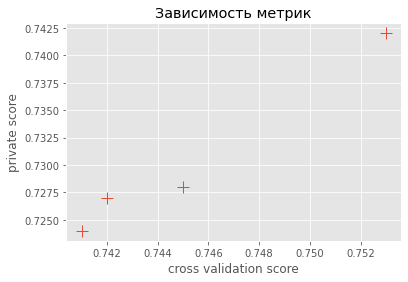

In [143]:
plt.plot(cr_val, private_score, '+', markersize=12)
plt.title("Зависимость метрик")
plt.xlabel("cross validation score")   
plt.ylabel("private score")
plt.show()

Таким образом, отмечаем прямопропорциональную зависимость данных показателей.

# Итог:

# best public score: 0.746
# best private score: 0.742